In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '7'
from keras.applications import VGG16

Using TensorFlow backend.
/data/bitt/wzq/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/bitt/wzq/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/bitt/wzq/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data/bitt/wzq

In [2]:
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

In [3]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [4]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [5]:
base_dir = r"/data/bitt/wzq/wzq/python-deep-learning/data/cats_and_dogs_small"

In [6]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [7]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

In [8]:
def extract_feature(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(directory, target_size=(150, 150), batch_size=batch_size,
                                            class_mode='binary')
    i = 0
    for input_batch, labels_batch in generator:
        print(input_batch.shape)
        features_batch = conv_base.predict(input_batch)
        features[i * batch_size: (i+1) * batch_size] = features_batch
        labels[i * batch_size: (i+1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

In [9]:
train_features, train_labels = extract_feature(train_dir, 2000)

Found 2000 images belonging to 2 classes.
(20, 150, 150, 3)

(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20

In [10]:
validation_features, validation_labels = extract_feature(validation_dir, 1000)

Found 1000 images belonging to 2 classes.
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)


In [11]:
test_features, test_labels = extract_feature(test_dir, 1000)

Found 1000 images belonging to 2 classes.
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)
(20, 150, 150, 3)


In [12]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [13]:
from keras import models
from keras import layers
from keras import optimizers

In [14]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [15]:
history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 2s 763us/step - loss: 0.6324 - acc: 0.6305 - val_loss: 0.4703 - val_acc: 0.8110
Epoch 2/30
2000/2000 [==============================] - 1s 572us/step - loss: 0.4417 - acc: 0.7925 - val_loss: 0.3688 - val_acc: 0.8710
Epoch 3/30
2000/2000 [==============================] - 2s 802us/step - loss: 0.3591 - acc: 0.8455 - val_loss: 0.3287 - val_acc: 0.8780
Epoch 4/30
2000/2000 [==============================] - 2s 876us/step - loss: 0.3222 - acc: 0.8605 - val_loss: 0.3027 - val_acc: 0.8940
Epoch 5/30
2000/2000 [==============================] - 2s 857us/step - loss: 0.2895 - acc: 0.8840 - val_loss: 0.2847 - val_acc: 0.8940
Epoch 6/30
2000/2000 [==============================] - 2s 839us/step - loss: 0.2628 - acc: 0.8950 - val_loss: 0.2768 - val_acc: 0.8960
Epoch 7/30
2000/2000 [==============================] - 2s 854us/step - loss: 0.2476 - acc: 0.9075 - val_loss: 0.2654 - val_acc: 0.9020


In [16]:
model.save('cats_and_dogs_small.h5')

In [17]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [18]:
epoches = range(1, len(acc) + 1)

In [19]:
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

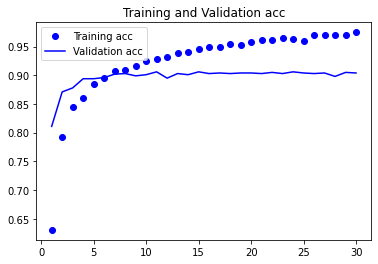

<Figure size 432x288 with 0 Axes>

In [20]:
plt.plot(epoches, acc, 'bo', label="Training acc")
plt.plot(epoches, val_acc, 'b', label="Validation acc")
plt.title("Training and Validation acc")
plt.legend()

plt.figure()


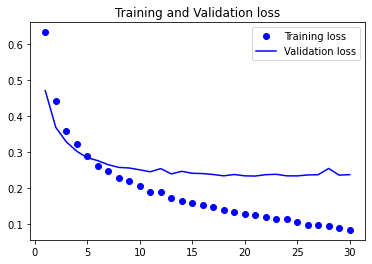

In [21]:
plt.plot(epoches, loss, 'bo', label="Training loss")
plt.plot(epoches, val_loss, 'b', label="Validation loss")
plt.title("Training and Validation loss")
plt.legend()
plt.show()